In [66]:
import pandas as pd

chunks = pd.read_csv(r"C:\Users\yigit\Downloads\accepted_2007_to_2018Q4.csv\accepted_2007_to_2018Q4.csv", chunksize=100000 , low_memory=False)
df = pd.concat(chunks)

print(df.shape)
df.head()


(2260701, 151)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df['loan_status'].value_counts()


loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

In [68]:

df['target_default'] = df['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)']).astype(int)


In [69]:
df['issue_d'].head()
df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce')


C:\Users\yigit\AppData\Local\Temp\ipykernel_6068\15625244.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce')


In [70]:
missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_summary[missing_summary > 0].head(20)


member_id                                     2260701
orig_projected_additional_accrued_interest    2252050
hardship_start_date                           2249784
deferral_term                                 2249784
hardship_type                                 2249784
hardship_reason                               2249784
hardship_last_payment_amount                  2249784
hardship_payoff_balance_amount                2249784
hardship_loan_status                          2249784
hardship_dpd                                  2249784
hardship_length                               2249784
payment_plan_start_date                       2249784
hardship_end_date                             2249784
hardship_status                               2249784
hardship_amount                               2249784
settlement_term                               2226455
settlement_percentage                         2226455
debt_settlement_flag_date                     2226455
settlement_status           

In [71]:
columns_of_interest = [
    'loan_amnt', 'term', 'int_rate', 'installment',
    'grade', 'sub_grade', 'emp_length', 'home_ownership',
    'annual_inc', 'dti', 'delinq_2yrs', 'revol_util',
    'mort_acc', 'pub_rec', 'issue_d', 'loan_status'
]

df[columns_of_interest].head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,revol_util,mort_acc,pub_rec,issue_d,loan_status
0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,5.91,0.0,29.7,1.0,0.0,2015-12-01,Fully Paid
1,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,16.06,1.0,19.2,4.0,0.0,2015-12-01,Fully Paid
2,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,10.78,0.0,56.2,5.0,0.0,2015-12-01,Fully Paid
3,35000.0,60 months,14.85,829.90,C,C5,10+ years,MORTGAGE,110000.0,17.06,0.0,11.6,1.0,0.0,2015-12-01,Current
4,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,104433.0,25.37,1.0,64.5,6.0,0.0,2015-12-01,Fully Paid


In [72]:
df.dtypes


id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
target_default             int32
Length: 152, dtype: object

In [73]:
df.describe() 


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,...,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term,target_default
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2260668,2.258957e+06,2.260639e+06,...,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000,2.260701e+06
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,2016-05-02 18:48:08.652733696,1.882420e+01,3.068792e-01,...,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322,1.283080e-01
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,2007-06-01 00:00:00,-1.000000e+00,0.000000e+00,...,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000,0.000000e+00
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,2015-04-01 00:00:00,1.189000e+01,0.000000e+00,...,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000,0.000000e+00
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,2016-07-01 00:00:00,1.784000e+01,0.000000e+00,...,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000,0.000000e+00
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2017-11-01 00:00:00,2.449000e+01,0.000000e+00,...,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000,0.000000e+00
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,2018-12-01 00:00:00,9.990000e+02,5.800000e+01,...,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000,1.000000e+00
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,NaN,1.418333e+01,8.672303e-01,...,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980,3.344325e-01


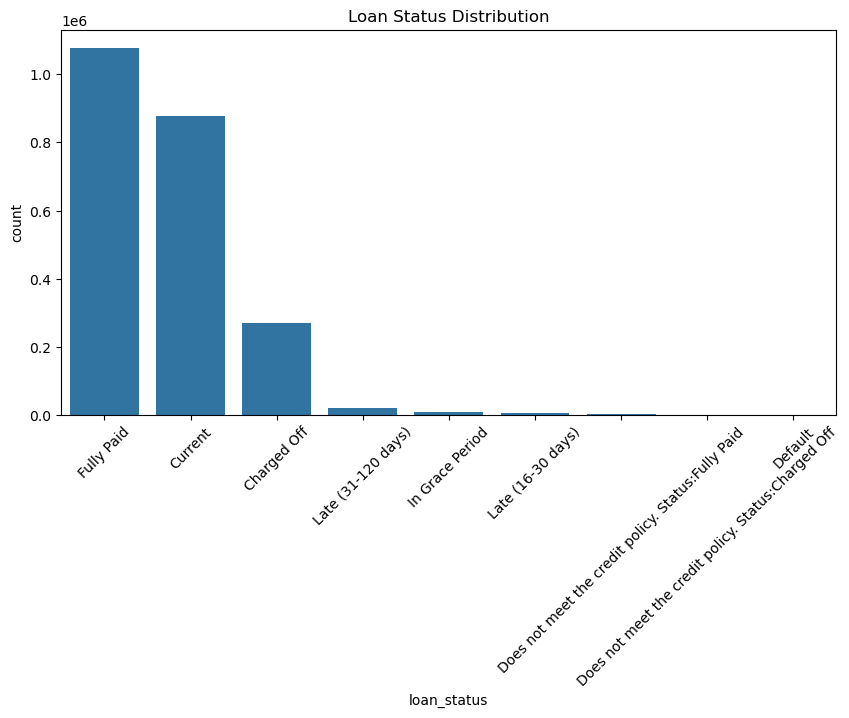

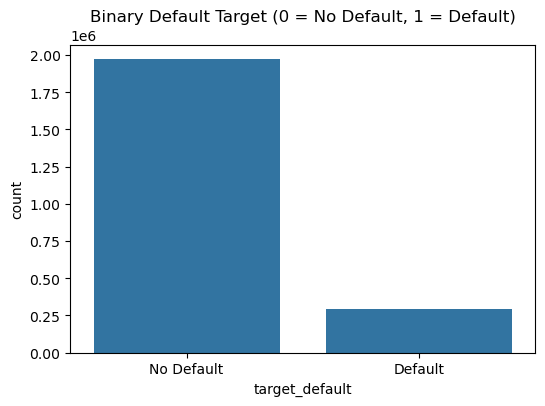

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='loan_status', order=df['loan_status'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Loan Status Distribution')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='target_default', data=df)
plt.title('Binary Default Target (0 = No Default, 1 = Default)')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.show()


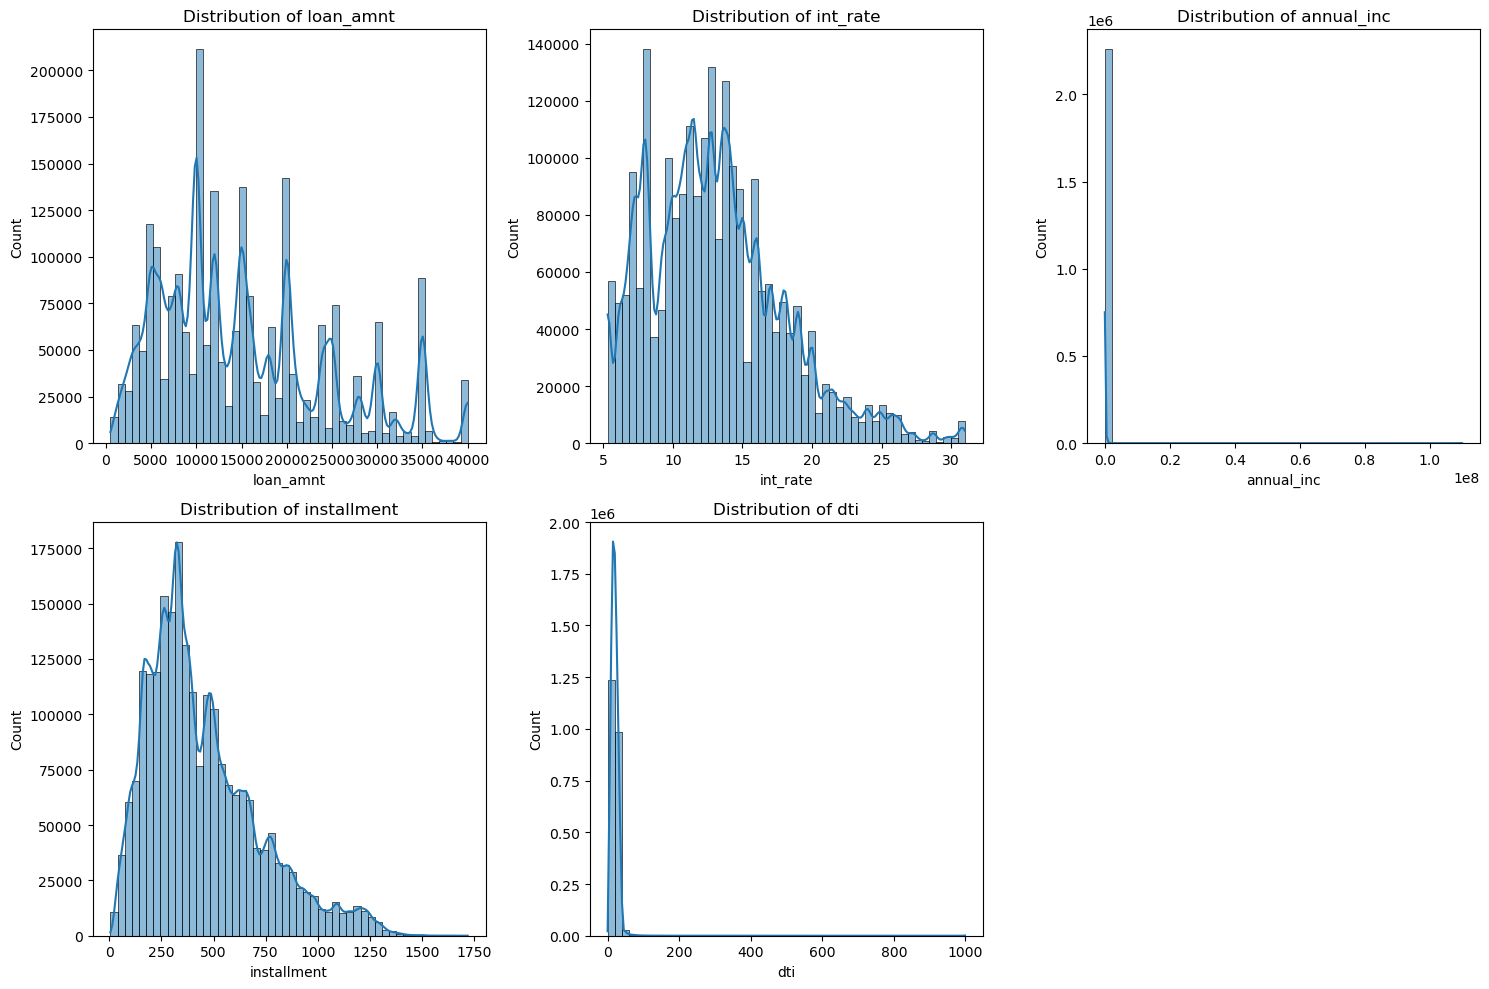

In [75]:
numeric_features = ['loan_amnt', 'int_rate', 'annual_inc', 'installment', 'dti']

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col].dropna(), kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()


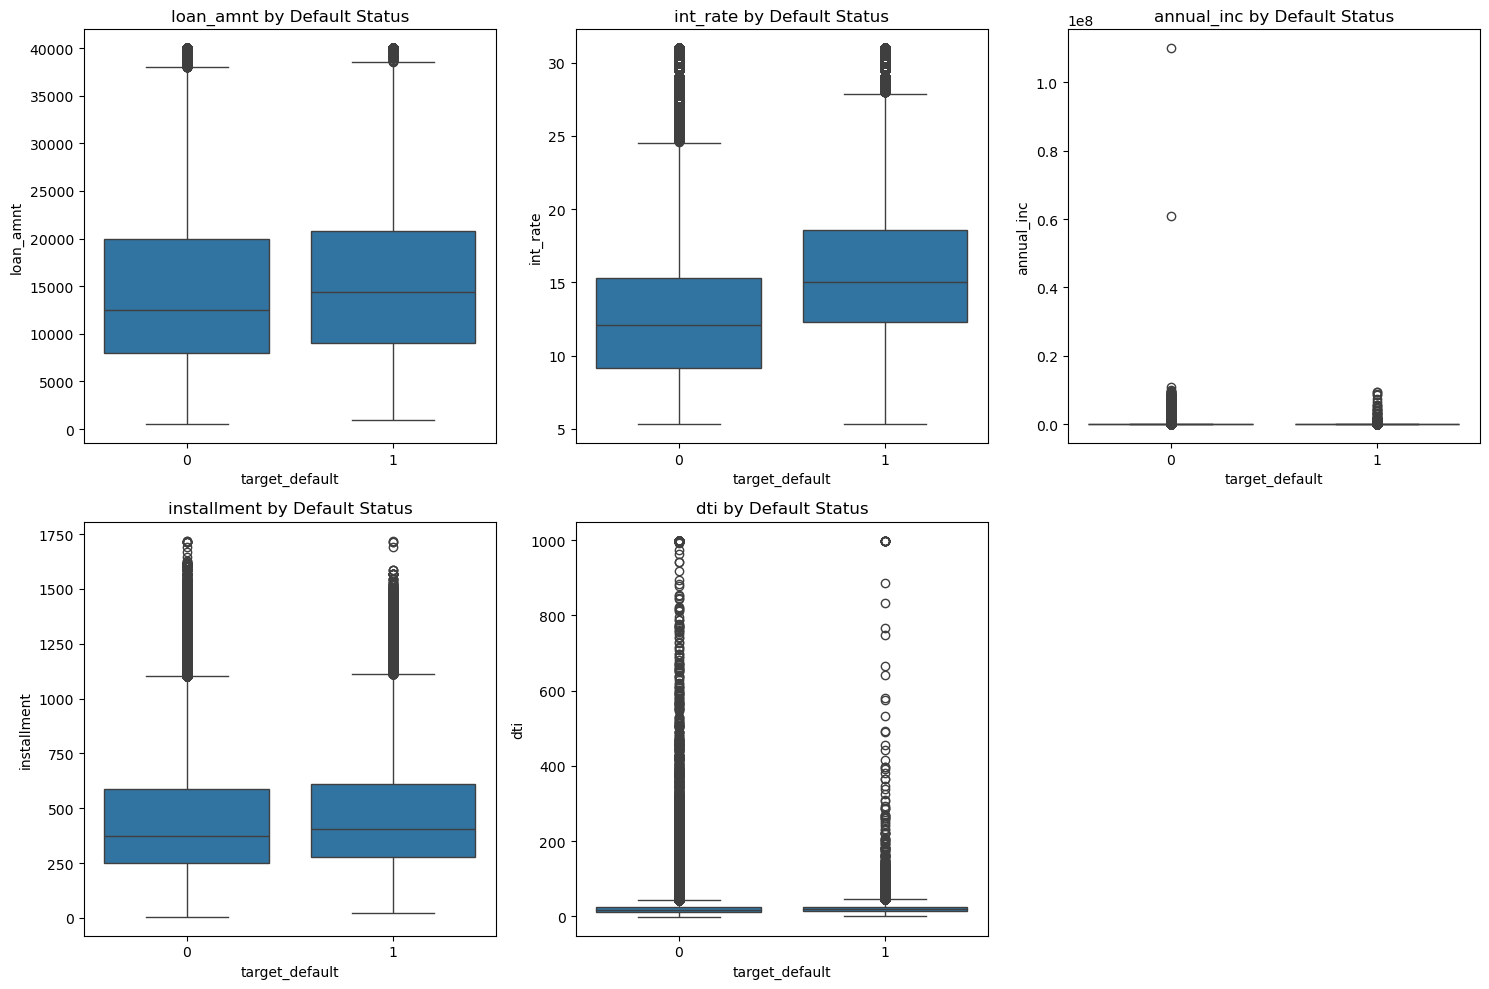

In [76]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='target_default', y=col, data=df)
    plt.title(f'{col} by Default Status')
    
plt.tight_layout()
plt.show()


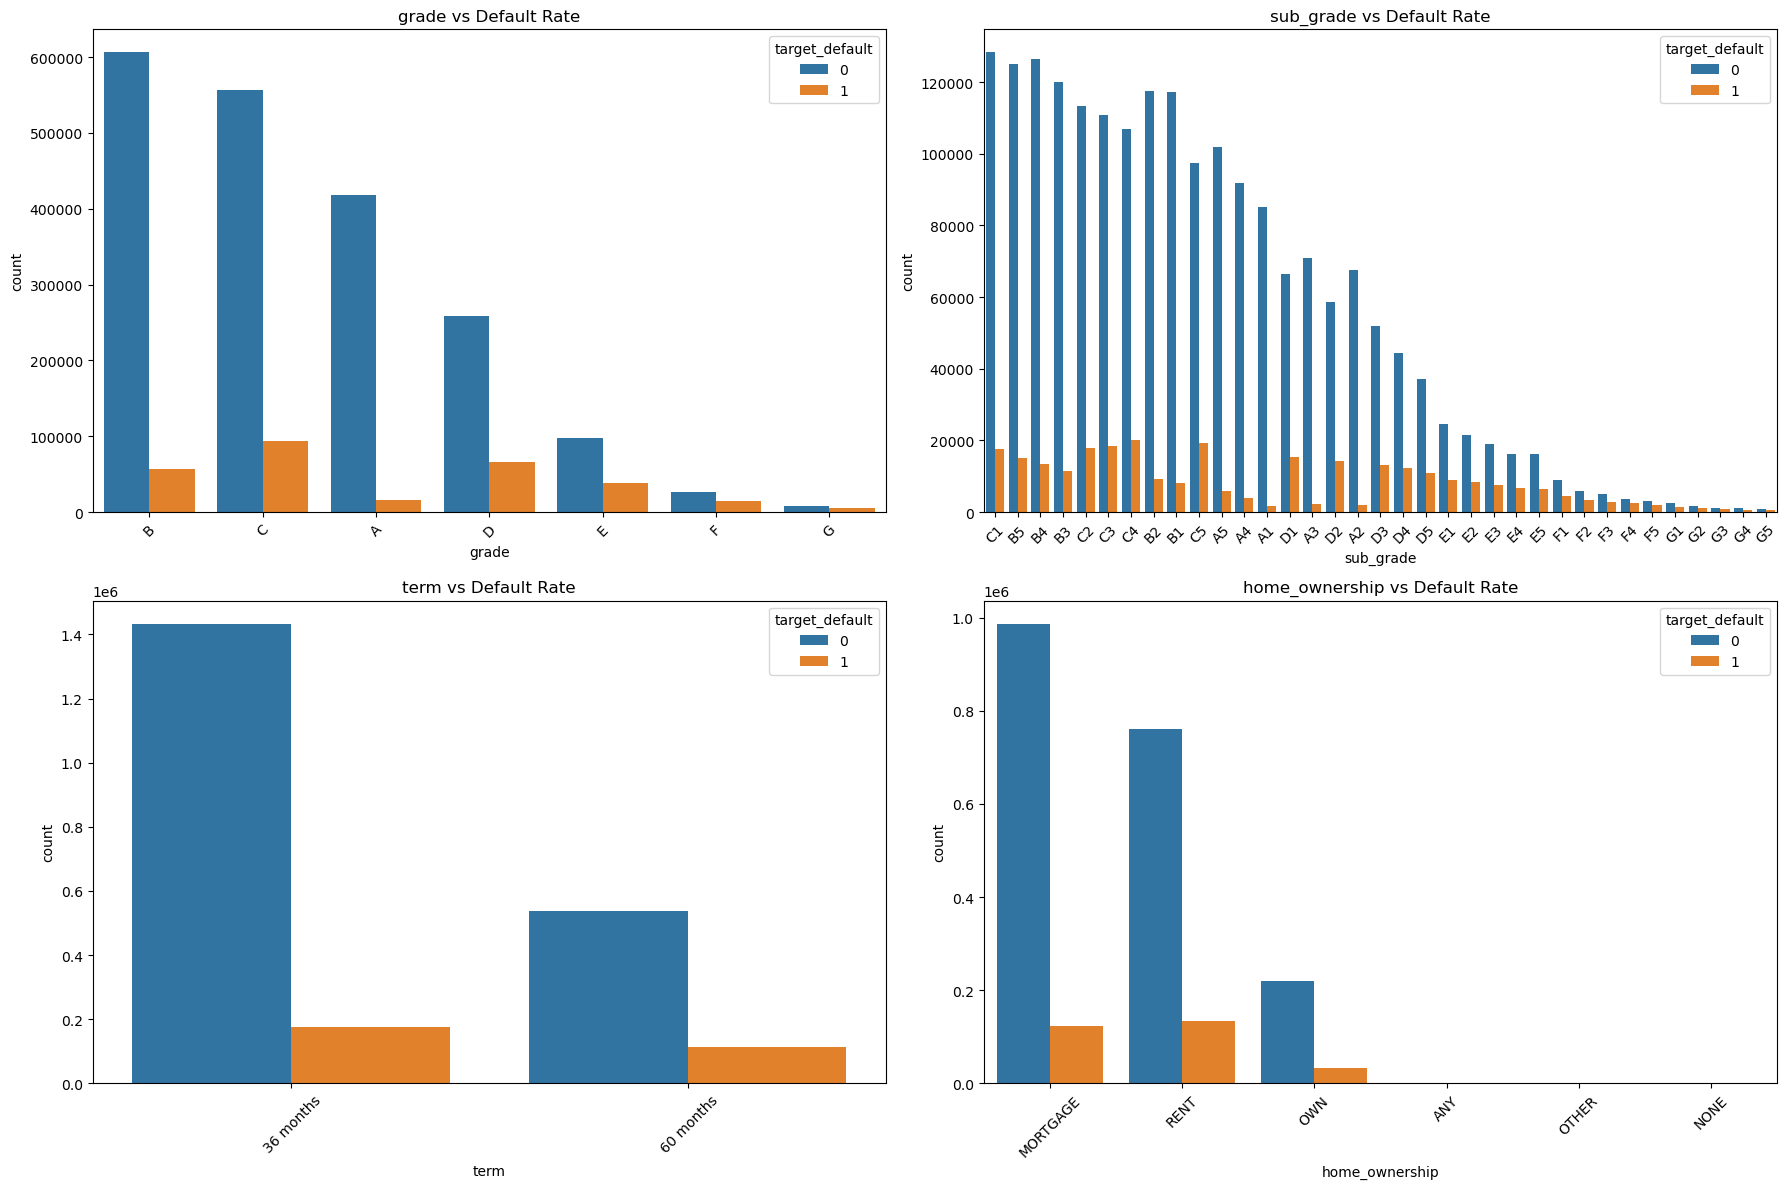

In [77]:

categorical_features = ['grade', 'sub_grade', 'term', 'home_ownership']

plt.figure(figsize=(18, 12))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue='target_default', data=df, order=df[col].value_counts().index)
    plt.title(f'{col} vs Default Rate')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [78]:

rows_before = df.shape[0]
rows_after = df.dropna().shape[0]
rows_lost = rows_before - rows_after
percent_lost = (rows_lost / rows_before) * 100

print(f"Rows before dropna: {rows_before}")
print(f"Rows after dropna: {rows_after}")
print(f"Rows that would be lost: {rows_lost} ({percent_lost:.2f}%)")


Rows before dropna: 2260701
Rows after dropna: 0
Rows that would be lost: 2260701 (100.00%)


In [79]:

threshold = 0.95
missing_ratio = df.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > threshold].index
df.drop(columns=cols_to_drop, inplace=True)

num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode(dropna=True).iloc[0], inplace=True)



C:\Users\yigit\AppData\Local\Temp\ipykernel_6068\4072213716.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode(dropna=True).iloc[0], inplace=True)


In [80]:
categorical_features = ['grade', 'term', 'home_ownership']



In [81]:
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)


In [82]:
print(df_encoded.shape)
df_encoded.head()


(2260701, 127)


,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,emp_title,emp_length,annual_inc,...,grade_D,grade_E,grade_F,grade_G,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,68407277,3600.0,3600.0,3600.0,13.99,123.03,C4,leadman,10+ years,55000.0,...,False,False,False,False,False,True,False,False,False,False
1,68355089,24700.0,24700.0,24700.0,11.99,820.28,C1,Engineer,10+ years,65000.0,...,False,False,False,False,False,True,False,False,False,False
2,68341763,20000.0,20000.0,20000.0,10.78,432.66,B4,truck driver,10+ years,63000.0,...,False,False,False,False,True,True,False,False,False,False
3,66310712,35000.0,35000.0,35000.0,14.85,829.90,C5,Information Systems Officer,10+ years,110000.0,...,False,False,False,False,True,True,False,False,False,False
4,68476807,10400.0,10400.0,10400.0,22.45,289.91,F1,Contract Specialist,3 years,104433.0,...,False,False,True,False,True,True,False,False,False,False


In [90]:
df_encoded.select_dtypes(include='object').columns


Index(['id', 'sub_grade', 'emp_title', 'emp_length', 'verification_status',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type', 'verification_status_joint', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

In [83]:
print([col for col in df_encoded.columns if 'grade_' in col or 'term_' in col or 'home_ownership_' in col])


['grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'term_ 60 months', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT']


In [84]:
df_encoded[[col for col in df_encoded.columns if 'grade_' in col or 'term_' in col or 'home_ownership_' in col]].head()


,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,False,True,False,False,False,False,False,True,False,False,False,False
1,False,True,False,False,False,False,False,True,False,False,False,False
2,True,False,False,False,False,False,True,True,False,False,False,False
3,False,True,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,True,False,True,True,False,False,False,False


In [85]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df_encoded.select_dtypes(include='number').drop(columns='target_default').columns

scaler = StandardScaler()

df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

df_encoded[numeric_cols].head()


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,-1.245558,-1.245233,-1.242719,0.185670,-1.208122,-0.204021,-0.910816,-0.353856,-0.714571,-0.714558,...,-0.165329,0.513650,-1.943303,-1.186773,-0.351466,-0.123882,0.010029,-0.870268,-0.906385,-0.667782
1,1.050371,1.051154,1.052689,-0.228228,1.401624,-0.115286,-0.194912,0.799254,0.497178,0.497159,...,-0.165329,-0.041268,0.346481,-0.970591,-0.351466,-0.123882,0.769310,-0.227895,2.470421,-0.421587
2,0.538956,0.539636,0.541389,-0.478637,-0.049204,-0.133033,-0.567323,-0.353856,-0.108696,-0.108699,...,-0.165329,-1.151105,0.636893,0.217011,-0.351466,-0.123882,0.235456,-0.648578,-0.739521,-0.642043
3,2.171133,2.172139,2.173196,0.363647,1.437631,0.284021,-0.124379,-0.353856,2.617738,2.617664,...,-0.165329,-0.596187,0.636893,-1.186773,-0.351466,-0.123882,1.144565,0.030256,1.732706,-0.571718
4,-0.505638,-0.505165,-0.502967,1.936461,-0.583504,0.234622,0.461745,0.799254,-0.108696,-0.108699,...,-0.165329,1.068569,0.257124,0.497768,-0.351466,-0.123882,1.470437,0.911790,-0.120367,1.006763


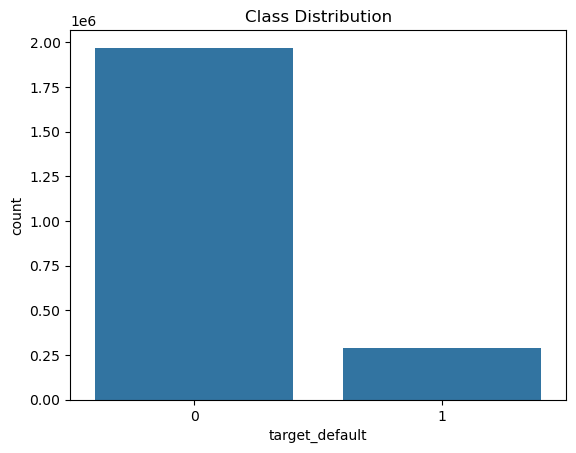

target_default
0    0.871692
1    0.128308
Name: proportion, dtype: float64

In [86]:
sns.countplot(x='target_default', data=df_encoded)
plt.title("Class Distribution")
plt.show()

df_encoded['target_default'].value_counts(normalize=True)

In [100]:
drop_cols = [
    'id', 'sub_grade', 'emp_title', 'title', 'url', 'desc',
    'zip_code', 'addr_state', 'earliest_cr_line', 'next_pymnt_d',
    'last_pymnt_d', 'last_credit_pull_d', 'emp_length',
    'verification_status', 'purpose', 'application_type',
    'verification_status_joint', 'hardship_flag', 'disbursement_method',
    'debt_settlement_flag'
]


drop_cols = [col for col in drop_cols if col in df_encoded.columns]

df_encoded = df_encoded.drop(columns=drop_cols)



In [106]:
non_numeric_cols = df_encoded.select_dtypes(include=['object', 'datetime64']).columns
df_encoded = df_encoded.drop(columns=non_numeric_cols)


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df_encoded.drop(columns='target_default')
y = df_encoded['target_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [110]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[393943    185]
 [  4587  53426]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    394128
           1       1.00      0.92      0.96     58013

    accuracy                           0.99    452141
   macro avg       0.99      0.96      0.98    452141
weighted avg       0.99      0.99      0.99    452141



C:\Users\yigit\AppData\Local\Temp\ipykernel_6068\11415882.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


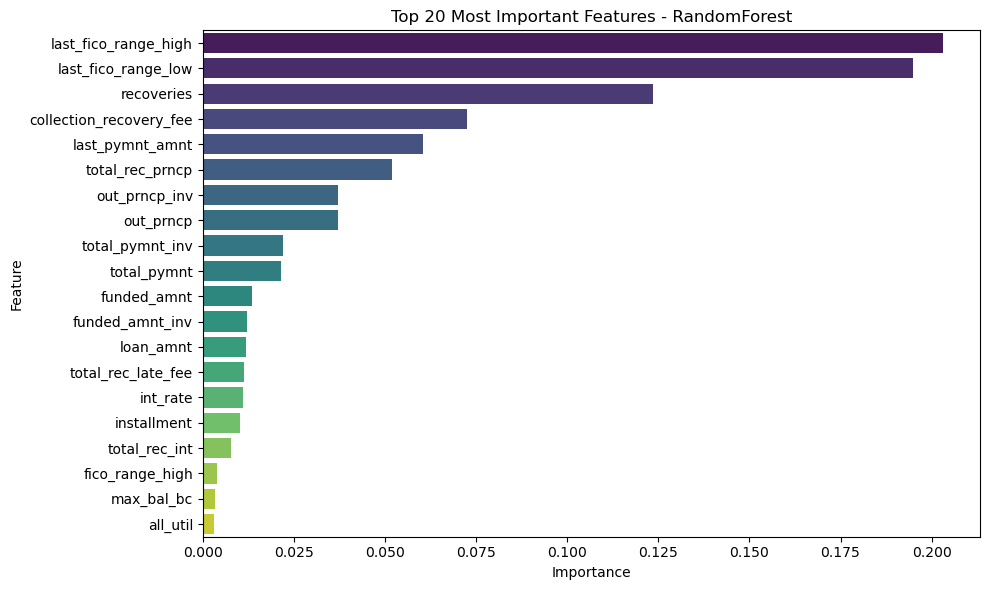

In [112]:
importances = rf.feature_importances_
feature_names = X_train.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(20)  # Top 20

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title("Top 20 Most Important Features - RandomForest")
plt.tight_layout()
plt.show()

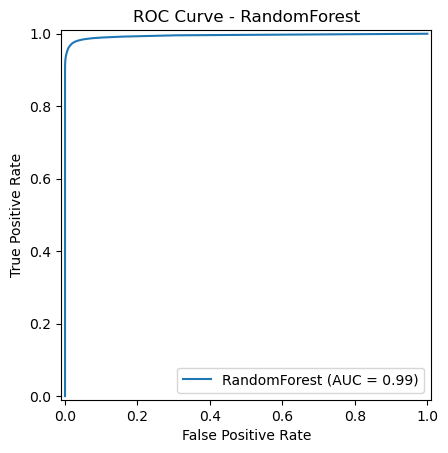

AUC Score: 0.9950


In [114]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

y_probs = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RandomForest').plot()
plt.title('ROC Curve - RandomForest')
plt.show()

print(f"AUC Score: {roc_auc:.4f}")


In [116]:
import joblib

joblib.dump(rf, 'Hybrid_Credit_random_forest_model.pkl')

joblib.dump(scaler, 'scaler.pkl')

joblib.dump(X_train.columns.tolist(), 'model_features.pkl')


['model_features.pkl']

In [118]:


from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


C:\Users\yigit\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:05:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [120]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Confusion Matrix:
 [[388163   5965]
 [  1855  56158]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    394128
           1       0.90      0.97      0.93     58013

    accuracy                           0.98    452141
   macro avg       0.95      0.98      0.96    452141
weighted avg       0.98      0.98      0.98    452141



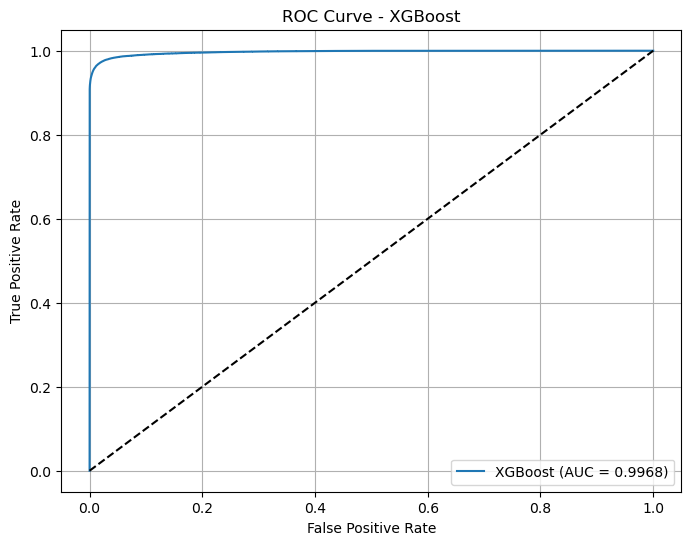

AUC Score: 0.9968


In [122]:
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

plt.figure(figsize=(8,6))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.4f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.grid(True)
plt.show()

print("AUC Score:", round(auc_xgb, 4))

C:\Users\yigit\AppData\Local\Temp\ipykernel_6068\3839549277.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_feat_imp_df.head(20), x='Importance', y='Feature', palette='plasma')


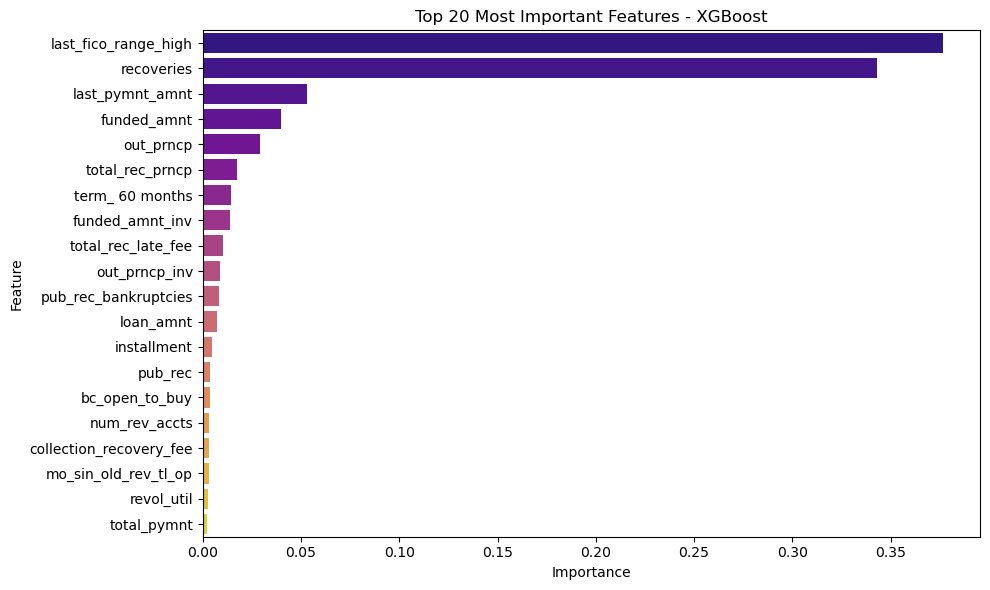

In [124]:
xgb_feat_imp_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_feat_imp_df.head(20), x='Importance', y='Feature', palette='plasma')
plt.title('Top 20 Most Important Features - XGBoost')
plt.tight_layout()
plt.show()

In [130]:
joblib.dump(xgb, 'Hybrid_Credit_XGBoost_model.pkl')

joblib.dump(scaler, 'scaler.pkl')

joblib.dump(X_train.columns.tolist(), 'model_features.pkl')



['model_features.pkl']